# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [42]:
%pip install iso3166


Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [43]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


In [44]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [45]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [46]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [47]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [48]:
df_data.shape

(4324, 9)

In [49]:
print(f'No of rows in dataframe: {df_data.shape[0]}')
print(f'No of columnss in dataframe: {df_data.shape[1]}')

No of rows in dataframe: 4324
No of columnss in dataframe: 9


In [50]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [51]:
df_data.isnull().sum()
df_data[df_data['Price'].isnull()].shape

(3360, 9)

In [52]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [53]:
duplicated_rows = df_data[df_data.duplicated()]
print(duplicated_rows)
duplicated_rows.shape

Empty DataFrame
Columns: [Unnamed: 0.1, Unnamed: 0, Organisation, Location, Date, Detail, Rocket_Status, Price, Mission_Status]
Index: []


(0, 9)

In [54]:
null_rows = df_data[df_data['Price'].isnull()]
null_rows.shape

(3360, 9)

In [55]:
# Iterate over rows and print each row
for index, row in null_rows.iterrows():
    print(f"Index: {index}, Price: {row.to_dict()['Price']}")

Index: 2, Price: nan
Index: 7, Price: nan
Index: 13, Price: nan
Index: 28, Price: nan
Index: 31, Price: nan
Index: 32, Price: nan
Index: 35, Price: nan
Index: 42, Price: nan
Index: 43, Price: nan
Index: 52, Price: nan
Index: 59, Price: nan
Index: 63, Price: nan
Index: 66, Price: nan
Index: 68, Price: nan
Index: 70, Price: nan
Index: 71, Price: nan
Index: 74, Price: nan
Index: 75, Price: nan
Index: 82, Price: nan
Index: 83, Price: nan
Index: 84, Price: nan
Index: 85, Price: nan
Index: 86, Price: nan
Index: 91, Price: nan
Index: 98, Price: nan
Index: 101, Price: nan
Index: 104, Price: nan
Index: 106, Price: nan
Index: 120, Price: nan
Index: 122, Price: nan
Index: 125, Price: nan
Index: 126, Price: nan
Index: 127, Price: nan
Index: 135, Price: nan
Index: 139, Price: nan
Index: 142, Price: nan
Index: 147, Price: nan
Index: 152, Price: nan
Index: 154, Price: nan
Index: 155, Price: nan
Index: 157, Price: nan
Index: 159, Price: nan
Index: 161, Price: nan
Index: 163, Price: nan
Index: 164, Pri

Index: 1603, Price: nan
Index: 1604, Price: nan
Index: 1608, Price: nan
Index: 1610, Price: nan
Index: 1611, Price: nan
Index: 1613, Price: nan
Index: 1614, Price: nan
Index: 1615, Price: nan
Index: 1616, Price: nan
Index: 1617, Price: nan
Index: 1618, Price: nan
Index: 1619, Price: nan
Index: 1620, Price: nan
Index: 1621, Price: nan
Index: 1622, Price: nan
Index: 1623, Price: nan
Index: 1624, Price: nan
Index: 1625, Price: nan
Index: 1627, Price: nan
Index: 1628, Price: nan
Index: 1629, Price: nan
Index: 1630, Price: nan
Index: 1631, Price: nan
Index: 1632, Price: nan
Index: 1635, Price: nan
Index: 1636, Price: nan
Index: 1637, Price: nan
Index: 1639, Price: nan
Index: 1640, Price: nan
Index: 1641, Price: nan
Index: 1642, Price: nan
Index: 1643, Price: nan
Index: 1644, Price: nan
Index: 1645, Price: nan
Index: 1646, Price: nan
Index: 1647, Price: nan
Index: 1649, Price: nan
Index: 1650, Price: nan
Index: 1651, Price: nan
Index: 1653, Price: nan
Index: 1654, Price: nan
Index: 1655, Pri

Index: 2778, Price: nan
Index: 2779, Price: nan
Index: 2780, Price: nan
Index: 2781, Price: nan
Index: 2782, Price: nan
Index: 2783, Price: nan
Index: 2784, Price: nan
Index: 2785, Price: nan
Index: 2786, Price: nan
Index: 2787, Price: nan
Index: 2788, Price: nan
Index: 2789, Price: nan
Index: 2790, Price: nan
Index: 2791, Price: nan
Index: 2792, Price: nan
Index: 2793, Price: nan
Index: 2794, Price: nan
Index: 2795, Price: nan
Index: 2796, Price: nan
Index: 2797, Price: nan
Index: 2798, Price: nan
Index: 2799, Price: nan
Index: 2800, Price: nan
Index: 2801, Price: nan
Index: 2802, Price: nan
Index: 2803, Price: nan
Index: 2804, Price: nan
Index: 2805, Price: nan
Index: 2806, Price: nan
Index: 2807, Price: nan
Index: 2808, Price: nan
Index: 2809, Price: nan
Index: 2810, Price: nan
Index: 2811, Price: nan
Index: 2812, Price: nan
Index: 2813, Price: nan
Index: 2814, Price: nan
Index: 2815, Price: nan
Index: 2816, Price: nan
Index: 2817, Price: nan
Index: 2818, Price: nan
Index: 2819, Pri

Index: 3733, Price: nan
Index: 3734, Price: nan
Index: 3735, Price: nan
Index: 3736, Price: nan
Index: 3738, Price: nan
Index: 3739, Price: nan
Index: 3740, Price: nan
Index: 3741, Price: nan
Index: 3742, Price: nan
Index: 3743, Price: nan
Index: 3744, Price: nan
Index: 3745, Price: nan
Index: 3747, Price: nan
Index: 3748, Price: nan
Index: 3749, Price: nan
Index: 3750, Price: nan
Index: 3751, Price: nan
Index: 3752, Price: nan
Index: 3753, Price: nan
Index: 3754, Price: nan
Index: 3755, Price: nan
Index: 3756, Price: nan
Index: 3757, Price: nan
Index: 3759, Price: nan
Index: 3760, Price: nan
Index: 3761, Price: nan
Index: 3762, Price: nan
Index: 3763, Price: nan
Index: 3764, Price: nan
Index: 3765, Price: nan
Index: 3766, Price: nan
Index: 3767, Price: nan
Index: 3768, Price: nan
Index: 3769, Price: nan
Index: 3770, Price: nan
Index: 3771, Price: nan
Index: 3772, Price: nan
Index: 3773, Price: nan
Index: 3774, Price: nan
Index: 3775, Price: nan
Index: 3776, Price: nan
Index: 3777, Pri

In [56]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [57]:
df_data['Price'] = df_data['Price'].fillna(0)

In [58]:
df_data.count()

Unnamed: 0.1      4324
Unnamed: 0        4324
Organisation      4324
Location          4324
Date              4324
Detail            4324
Rocket_Status     4324
Price             4324
Mission_Status    4324
dtype: int64

## Descriptive Statistics

In [59]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           4324 non-null   object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [60]:
df_data['Price'] = df_data['Price'].replace({',': ''}, regex=True).astype(str).astype(float)

In [61]:
# Convert the column to datetime
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')

In [62]:
# Remove timezone information
df_data['Date'] = df_data['Date'].dt.tz_localize(None)

In [63]:
# Check for any NaT values in the Date column
if df_data['Date'].isna().any():
    print("Warning: Some rows have invalid or missing dates. These will be filled with placeholders.")
    # Fill NaT values with a default date (e.g., "1970-01-01")
    df_data['Date'] = df_data['Date'].fillna(pd.Timestamp("1970-01-01"))

# Extract year, month, and day into separate columns as integers
df_data['Year'] = df_data['Date'].dt.year.astype(int)
df_data['Month'] = df_data['Date'].dt.month.astype(int)
df_data['Day'] = df_data['Date'].dt.day.astype(int)

In [64]:
df_data.dtypes

Unnamed: 0.1               int64
Unnamed: 0                 int64
Organisation              object
Location                  object
Date              datetime64[ns]
Detail                    object
Rocket_Status             object
Price                    float64
Mission_Status            object
Year                       int32
Month                      int32
Day                        int32
dtype: object

In [65]:
df_data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True) 

In [66]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month,Day
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,8,7
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,8,6
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,2020,8,4
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,7,30
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,7,30


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

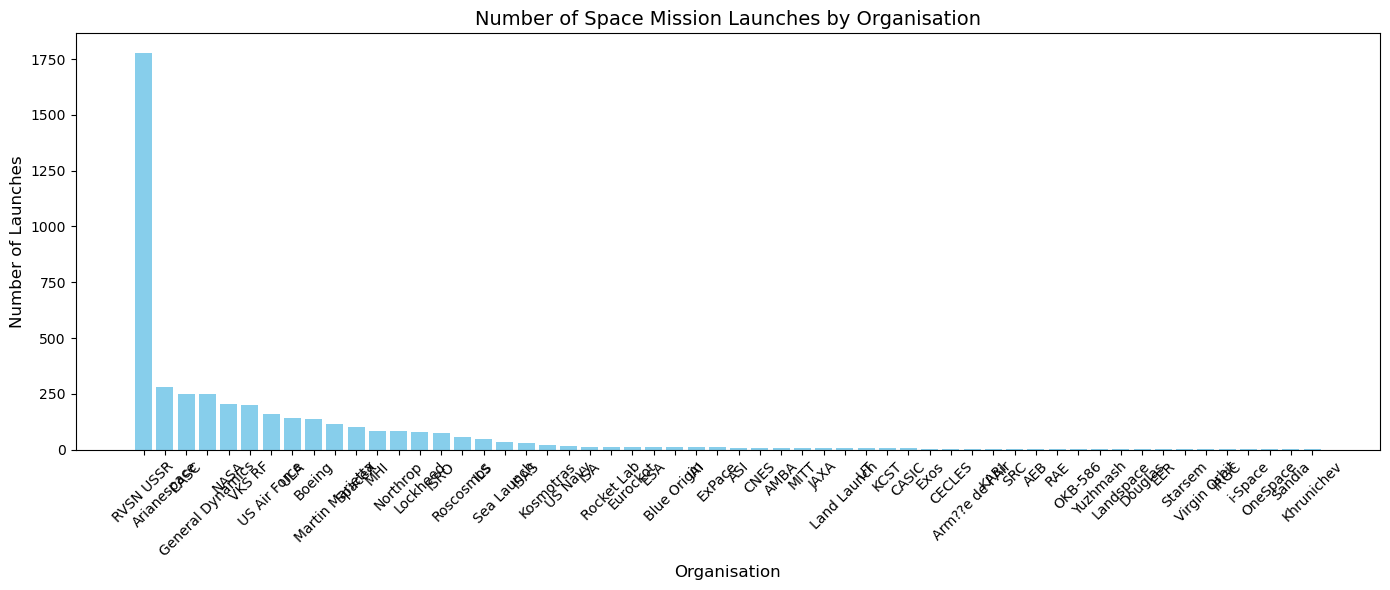

In [67]:
# Count the number of launches by organisation
launch_counts = df_data['Organisation'].value_counts()

# Create the chart
plt.figure(figsize=(14, 6))
plt.bar(launch_counts.index, launch_counts.values, color='skyblue')

# Add titles and labels
plt.title('Number of Space Mission Launches by Organisation', fontsize=14)
plt.xlabel('Organisation', fontsize=12)
plt.ylabel('Number of Launches', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.tight_layout()

# Show the chart
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [68]:
# Count active and decommissioned rockets
rocket_status_counts = df_data['Rocket_Status'].value_counts()
rocket_status_counts

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

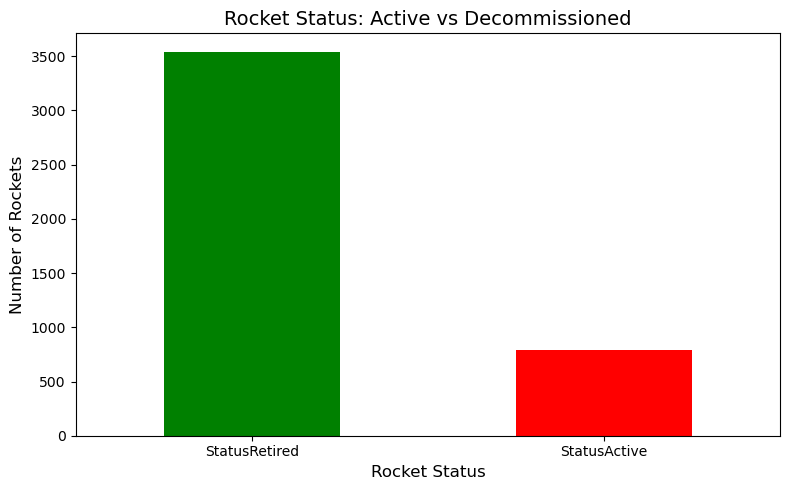

In [69]:
# Create the chart for rocket status
plt.figure(figsize=(8, 5))
rocket_status_counts.plot(kind='bar', color=['green', 'red'])

# Add titles and labels
plt.title('Rocket Status: Active vs Decommissioned', fontsize=14)
plt.xlabel('Rocket Status', fontsize=12)
plt.ylabel('Number of Rockets', fontsize=12)
plt.xticks(rotation=360)

plt.tight_layout()
plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [70]:
mission_status = df_data['Mission_Status'].value_counts()
mission_status

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

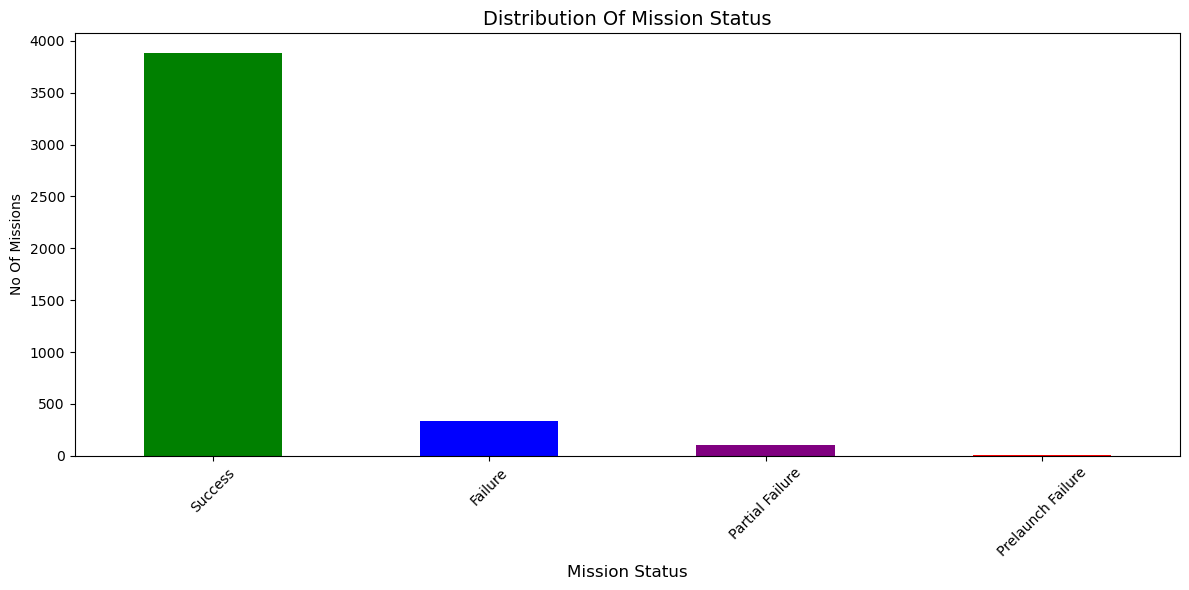

In [147]:
plt.figure(figsize=(12,6))
# sns.countplot(data=df_data, x='Mission_Status', palette='viridis')
mission_status.plot(kind='bar', color=['green','blue', 'purple', 'red'])
plt.title('Distribution Of Mission Status', fontsize=14)
plt.xlabel('Mission Status', fontsize=12)
plt.ylabel('No Of Missions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

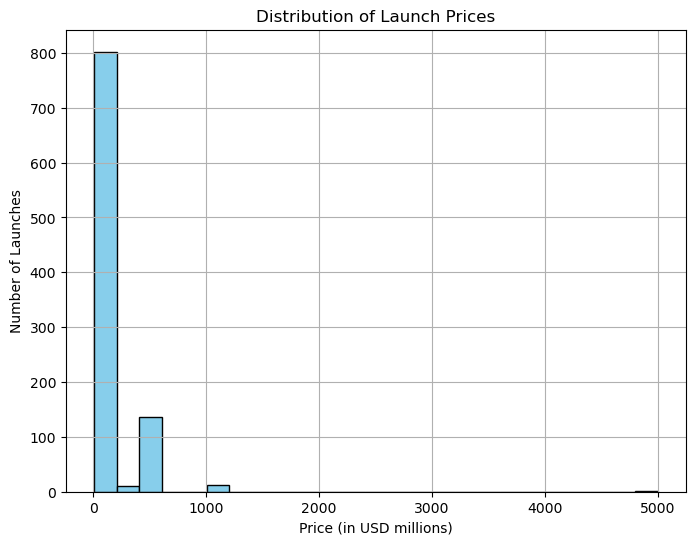

In [72]:
# Plotting the histogram for the Price column
plt.figure(figsize=(8, 6))
df = df_data[(df_data['Price'] > 0)]
plt.hist(df['Price'], bins=25, color='skyblue', edgecolor='black')
plt.title("Distribution of Launch Prices")
plt.xlabel("Price (in USD millions)")
plt.ylabel("Number of Launches")
plt.grid(True)
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [73]:
# Function to extract the country name
def extract_country(location):
    # Split the location by commas and check the last part for country name
    return location.split(",")[-1].strip()

# Apply the function to the 'Location' column
df_data['Country'] = df_data['Location'].apply(extract_country)
df_data['Country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Shahrud Missile Test Site', 'France', 'Iran', 'India',
       'New Mexico', 'Yellow Sea', 'North Korea',
       'Pacific Missile Range Facility', 'Pacific Ocean', 'South Korea',
       'Barents Sea', 'Brazil', 'Gran Canaria', 'Kenya', 'Australia'],
      dtype=object)

In [74]:
import numpy as np
from iso3166 import countries

# Dictionary for custom replacements
country_replacements = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA'
}

# Function to convert country name to Alpha3 format and apply custom replacements
def convert_to_alpha3(country_name):
    # Apply custom replacements if country name matches any key in the dictionary
    if country_name in country_replacements:
        country_name = country_replacements[country_name]
    
    # Convert to Alpha3 format using iso3166 package
    try:
        return countries.get(country_name).alpha3
    except KeyError:
        # Return the original country name if it cannot be found in the iso3166 database
        return country_name

# Apply the conversion to the array
df_data['Country_Code'] = df_data['Country'].apply(convert_to_alpha3)

In [75]:
# df_data.drop('Converted_countries', axis=1, inplace=True)
df_data.tail()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month,Day,Country,Country_Code
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,1958,2,5,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00,Juno I | Explorer 1,StatusRetired,0.00,Success,1958,2,1,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00,Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,1957,12,6,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,1957,11,3,Kazakhstan,KAZ
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,0.00,Success,1957,10,4,Kazakhstan,KAZ


In [76]:
df_data_failure = df_data[df_data['Mission_Status']=='Failure']['Country_Code'].value_counts().reset_index()
df_data_failure.columns = ['Country_Code', 'Failures']
df_data_failure

,Country_Code,Failures
0,USA,129
1,KAZ,72
2,RUS,63
3,CHN,19
4,FRA,13
5,JPN,10
6,Iran,8
7,IND,8
8,Pacific Ocean,3
9,North Korea,3


# Use a Choropleth Map to Show the Number of Failures by Country


In [77]:
# Create a base map centered on the world
world_map = folium.Map(location=[20, 0], zoom_start=2)

# Create a Choropleth map using the country codes and failure data
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json',  # GeoJSON for countries
    name='choropleth',
    data=df_data_failure,
    columns=['Country_Code', 'Failures'],
    key_on='feature.id',  # Matching the country code in the GeoJSON file
    fill_color='YlOrRd',  # Color scale
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Failures',
).add_to(world_map)

# Add a layer control to the map
folium.LayerControl().add_to(world_map)

# Save the map as an HTML file
world_map.save('failures_choropleth_map.html')

# Display message
print("Choropleth map saved as 'failures_choropleth_map.html'.")

# Display the map inline in Jupyter notebook
world_map

Choropleth map saved as 'failures_choropleth_map.html'.


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [78]:
df_sunburst = df_data.groupby(['Country','Organisation'])['Mission_Status'].value_counts().reset_index()

In [79]:
px.sunburst(df_sunburst, path=['Country', 'Organisation','Mission_Status'], values='count',title='Mission Status By Country')

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [80]:
df_Moneyspent = df_data.groupby('Organisation')['Price'].sum().sort_values(ascending=False)

In [81]:
df_Moneyspent

Organisation
NASA               76,280.00
Arianespace        16,345.00
ULA                14,798.00
RVSN USSR          10,000.00
CASC                6,340.26
SpaceX              5,444.00
Northrop            3,930.00
MHI                 3,532.50
ISRO                2,177.00
US Air Force        1,550.92
VKS RF              1,548.90
ILS                 1,320.00
Boeing              1,241.00
Roscosmos           1,187.50
Martin Marietta       721.40
Kosmotras             638.00
Eurockot              543.40
Lockheed              280.00
JAXA                  168.00
Rocket Lab             97.50
ESA                    37.00
ExPace                 28.30
EER                    20.00
Sandia                 15.00
Virgin Orbit           12.00
SRC                     0.00
Yuzhmash                0.00
RAE                     0.00
OneSpace                0.00
OKB-586                 0.00
US Navy                 0.00
Sea Launch              0.00
UT                      0.00
Starsem                 0.00
A

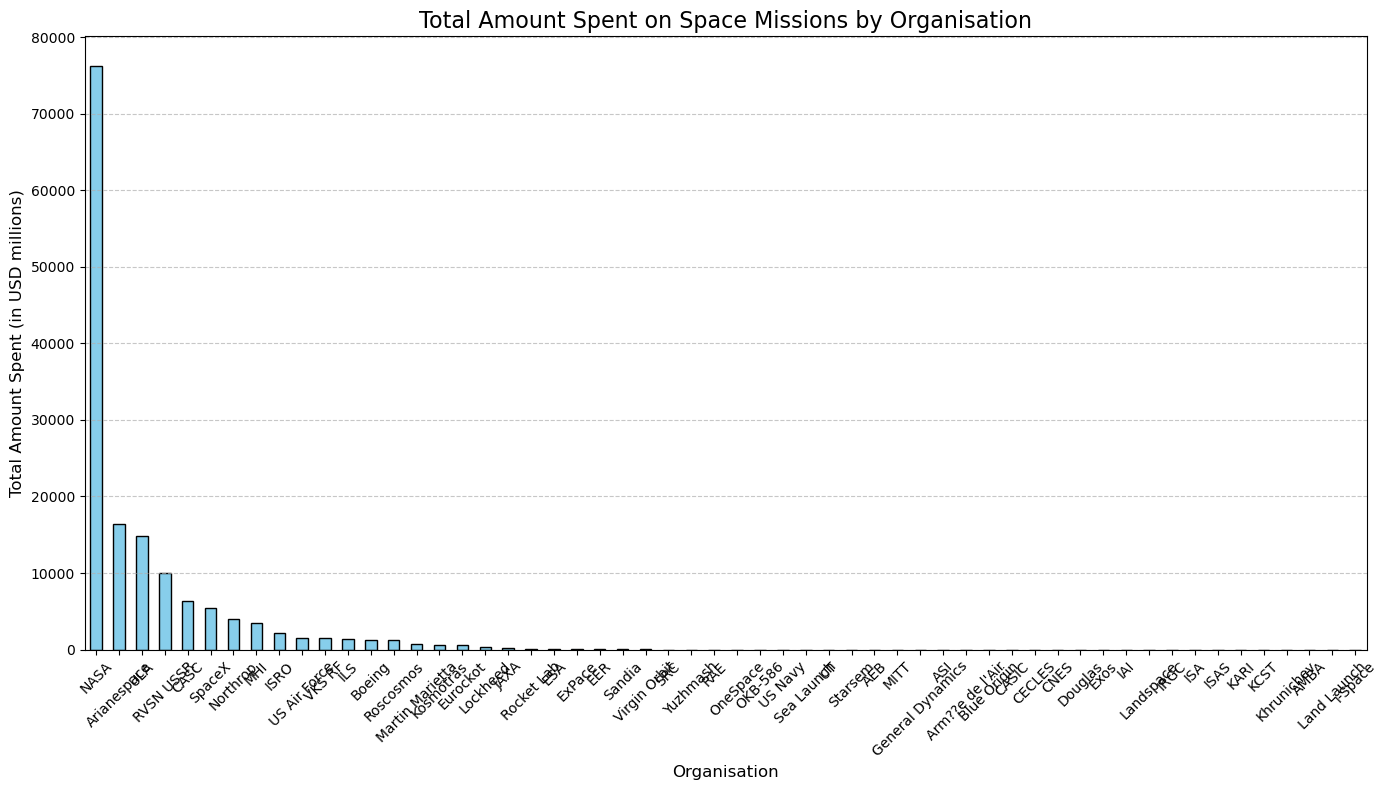

In [83]:
# Plot the results
plt.figure(figsize=(14, 8))
df_Moneyspent.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total Amount Spent on Space Missions by Organisation", fontsize=16)
plt.xlabel("Organisation", fontsize=12)
plt.ylabel("Total Amount Spent (in USD millions)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [84]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month,Day,Country,Country_Code
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,8,7,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,8,6,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,2020,8,4,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,7,30,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,7,30,USA,USA


In [85]:
# Ensure the 'Price' column is numeric (handle missing or invalid values)
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

# Group by 'Organisation' and calculate the average amount spent per launch
money_spent_per_launch = df_data.groupby('Organisation')['Price'].mean().sort_values(ascending=False)

# Display the results
print("Average Amount Spent per Launch by Organisation (in USD millions):\n")
print(money_spent_per_launch)

Average Amount Spent per Launch by Organisation (in USD millions):

Organisation
NASA               375.76
ULA                105.70
Arianespace         58.58
SpaceX              54.44
Northrop            47.35
MHI                 42.05
Eurockot            41.80
Kosmotras           29.00
ILS                 28.70
ISRO                28.64
CASC                25.26
JAXA                24.00
Roscosmos           21.59
EER                 20.00
Sandia              15.00
Virgin Orbit        12.00
US Air Force         9.63
Boeing               9.12
VKS RF               7.71
Rocket Lab           7.50
Martin Marietta      6.33
RVSN USSR            5.63
Lockheed             3.54
ESA                  2.85
ExPace               2.83
OneSpace             0.00
OKB-586              0.00
US Navy              0.00
RAE                  0.00
Sea Launch           0.00
Starsem              0.00
UT                   0.00
Yuzhmash             0.00
SRC                  0.00
AEB                  0.00
MITT     

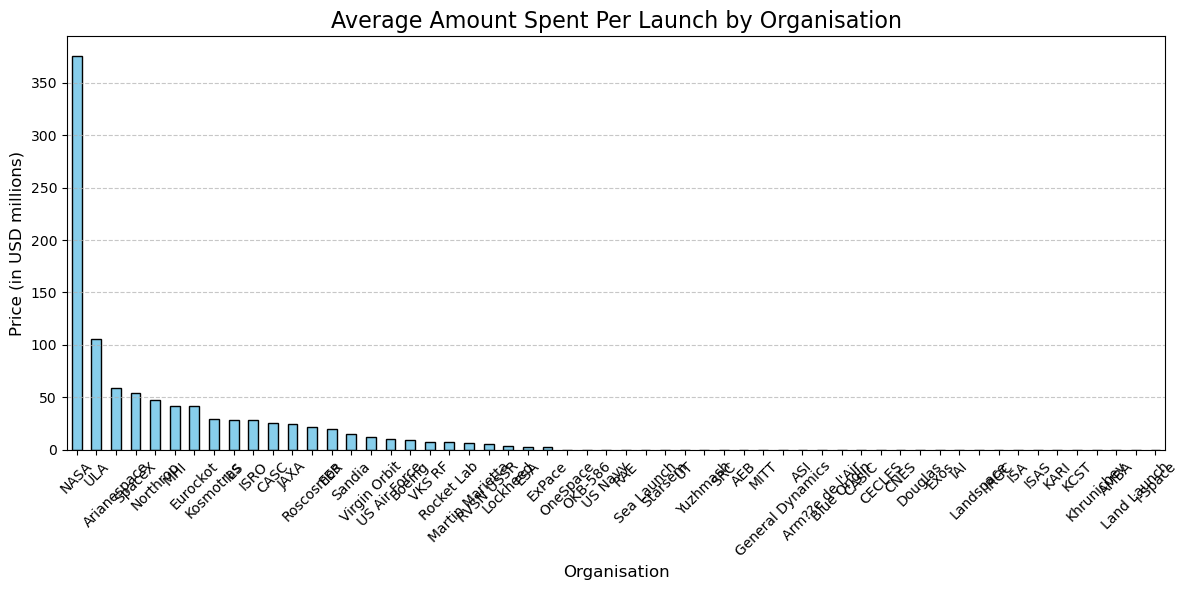

In [86]:
plt.figure(figsize=(12, 6))
money_spent_per_launch.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Amount Spent Per Launch by Organisation", fontsize=16)
plt.xlabel("Organisation", fontsize=12)
plt.ylabel("Price (in USD millions)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Chart the Number of Launches per Year

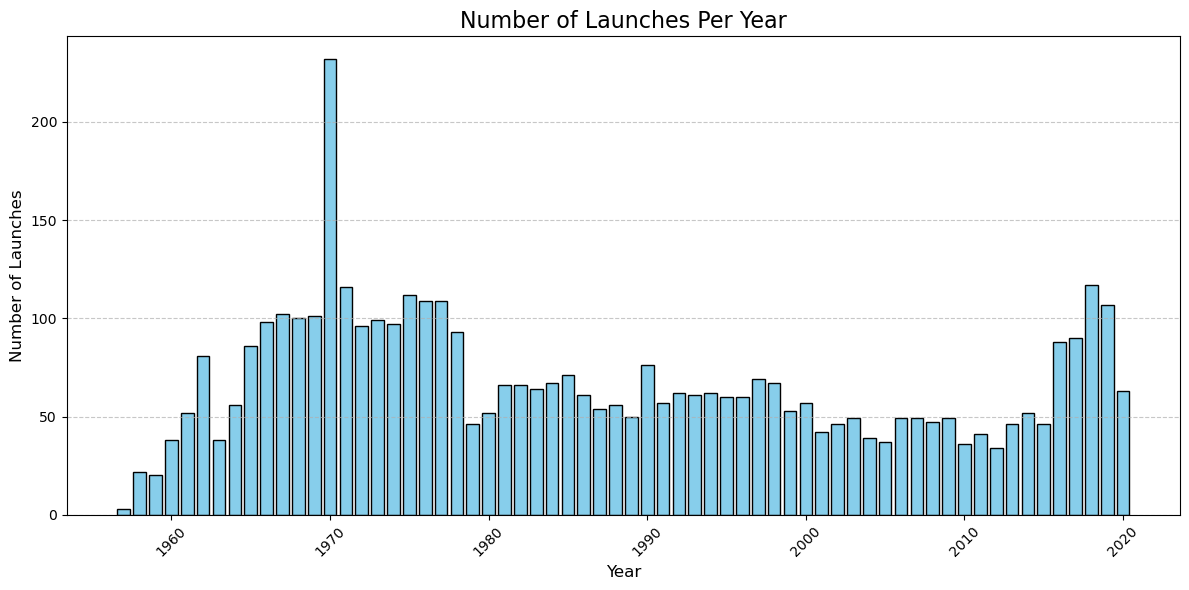

In [87]:
# Count the number of launches per year
launches_per_year = df_data['Year'].value_counts().sort_index()

# Plot the chart
plt.figure(figsize=(12, 6))
plt.bar(launches_per_year.index, launches_per_year.values, color='skyblue', edgecolor='black')
plt.title("Number of Launches Per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Launches", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [88]:
# Count the number of launches per Year-Month
launches_monthly = df_data['Month'].value_counts().sort_index()

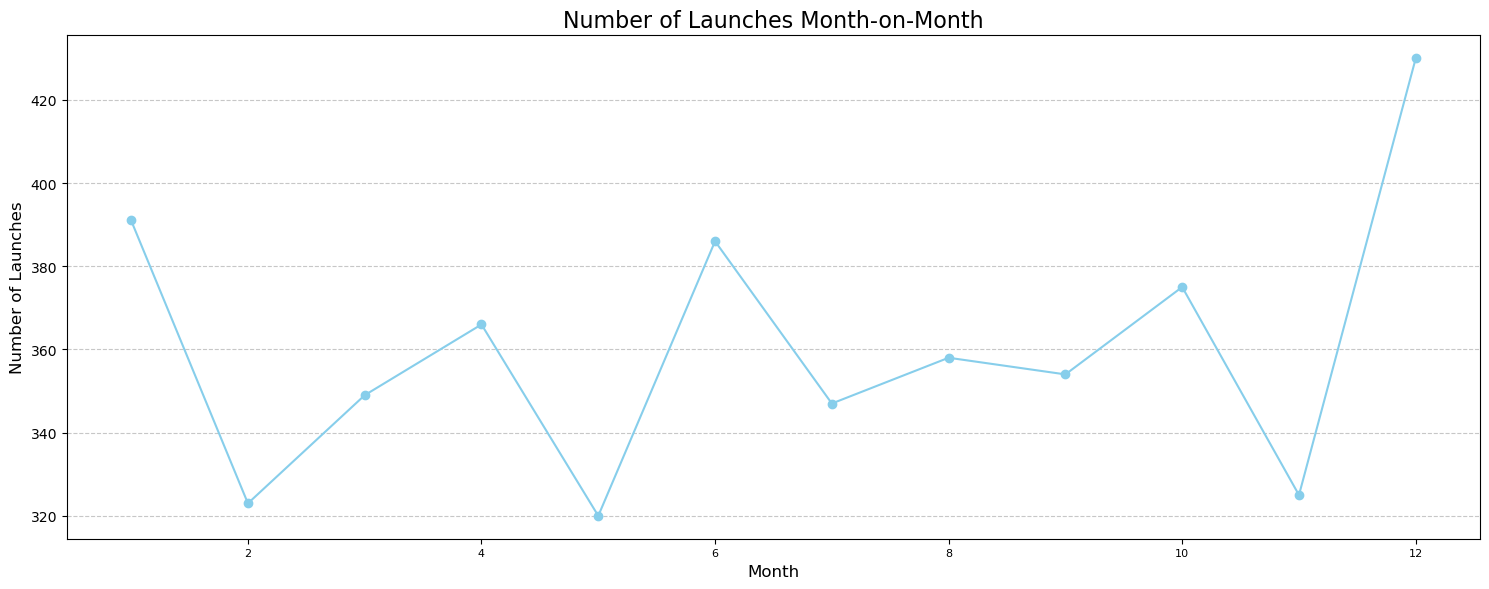

In [89]:
# Plot the chart
plt.figure(figsize=(15, 6))
plt.plot(launches_monthly.index, launches_monthly.values, marker='o', linestyle='-', color='skyblue')
plt.title("Number of Launches Month-on-Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Launches", fontsize=12)
plt.xticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [90]:
# Count the number of launches per month
launches_monthly = df_data['Month'].value_counts()

# Display the most and least popular months
most_popular_month = launches_monthly.idxmax()
least_popular_month = launches_monthly.idxmin()
print(f"Most Popular Month: {most_popular_month} ({launches_monthly.max()} launches)")
print(f"Least Popular Month: {least_popular_month} ({launches_monthly.min()} launches)")

Most Popular Month: 12 (430 launches)
Least Popular Month: 5 (320 launches)


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [91]:
# Group by year and calculate the average launch price
average_price_per_year = df_data.groupby('Year')['Price'].mean().reset_index()

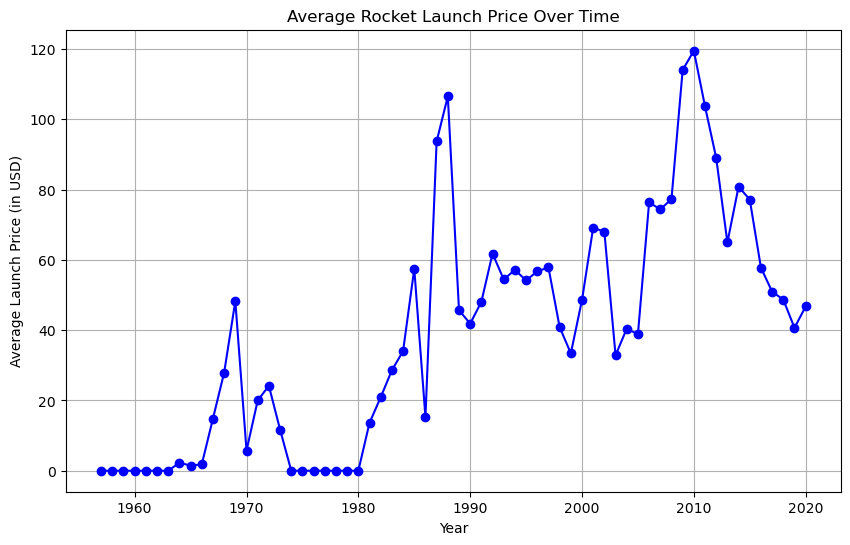

In [92]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(average_price_per_year['Year'], average_price_per_year['Price'], marker='o', linestyle='-', color='b')
plt.title('Average Rocket Launch Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Launch Price (in USD)')
plt.grid()
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [96]:
launches_per_year = df_data.groupby(['Year', 'Organisation']).size().reset_index(name='Launch Count')
launches_per_year

,Year,Organisation,Launch Count
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,AMBA,7
3,1958,NASA,2
4,1958,RVSN USSR,5
...,...,...,...
640,2020,Roscosmos,4
641,2020,SpaceX,14
642,2020,ULA,4
643,2020,VKS RF,3


In [100]:
# Get the top 10 organizations by total number of launches
top_organisations = launches_per_year.groupby('Organisation')['Launch Count'].sum().nlargest(10).index
top_organisations

Index(['RVSN USSR', 'Arianespace', 'CASC', 'General Dynamics', 'NASA',
       'VKS RF', 'US Air Force', 'ULA', 'Boeing', 'Martin Marietta'],
      dtype='object', name='Organisation')

In [102]:
# Filter data to include only the top 10 organizations
filtered_data = launches_per_year[launches_per_year['Organisation'].isin(top_organisations)]
filtered_data

,Year,Organisation,Launch Count
0,1957,RVSN USSR,2
3,1958,NASA,2
4,1958,RVSN USSR,5
5,1958,US Air Force,2
7,1959,General Dynamics,1
...,...,...,...
628,2019,VKS RF,8
630,2020,Arianespace,4
631,2020,CASC,19
642,2020,ULA,4


In [104]:
# Pivot data for plotting
pivot_data = filtered_data.pivot(index='Year', columns='Organisation', values='Launch Count').fillna(0)
pivot_data

Organisation,Arianespace,Boeing,CASC,General Dynamics,Martin Marietta,NASA,RVSN USSR,ULA,US Air Force,VKS RF
Year,,,,,,,,,,
1957,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00
1958,0.00,0.00,0.00,0.00,0.00,2.00,5.00,0.00,2.00,0.00
1959,0.00,0.00,0.00,1.00,0.00,1.00,4.00,0.00,10.00,0.00
1960,0.00,0.00,0.00,5.00,0.00,4.00,8.00,0.00,21.00,0.00
1961,0.00,0.00,0.00,8.00,0.00,12.00,9.00,0.00,23.00,0.00
...,...,...,...,...,...,...,...,...,...,...
2016,11.00,0.00,22.00,0.00,0.00,0.00,0.00,12.00,0.00,4.00
2017,11.00,0.00,16.00,0.00,0.00,0.00,0.00,8.00,0.00,6.00
2018,11.00,0.00,37.00,0.00,0.00,0.00,0.00,8.00,0.00,5.00


<Figure size 1400x800 with 0 Axes>

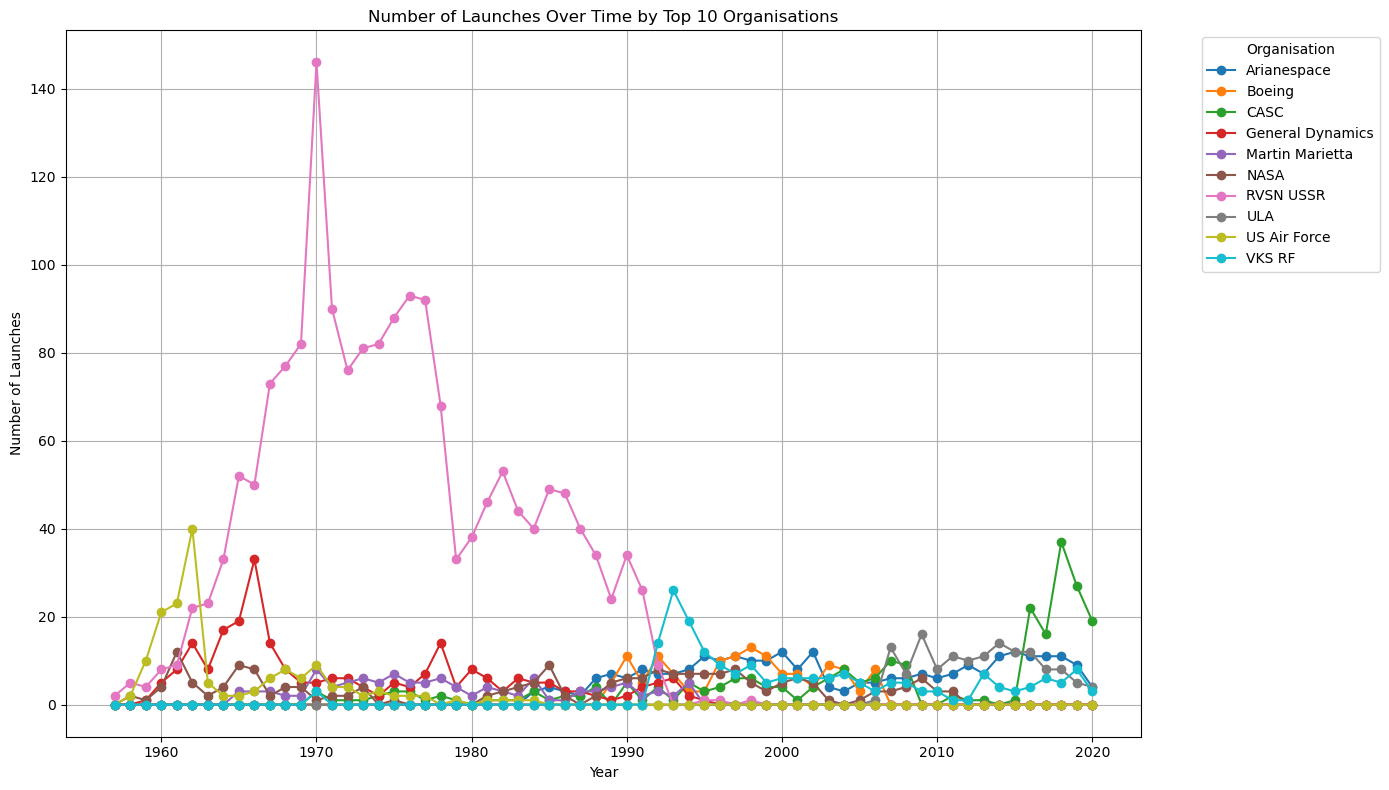

In [105]:
# Plot the number of launches over time for the top 10 organizations
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='line', figsize=(14, 8), marker='o')
plt.title('Number of Launches Over Time by Top 10 Organisations')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.grid()
plt.legend(title='Organisation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [145]:
# Filter data for the Cold War period (up to 1991)
cold_war_data = df_data[df_data['Year'] <= 1991]

In [144]:
# Filter data for the Cold War period (up to 1991)
cold_war_data = df_data[df_data['Year'] <= 1991]

# Add a column to categorize launches by country (USA vs USSR)
def categorize_country(location):
    if "USA" in location:
        return "USA"
    elif "Kazakhstan" in location or "Russia" in location:
        return "USSR"
    else:
        return "Other"

cold_war_data.loc[:,'Country'] = cold_war_data['Location'].apply(categorize_country)

# Filter only USA and USSR launches
cold_war_usa_ussr = cold_war_data[cold_war_data['Country'].isin(['USA', 'USSR'])]

# Count the number of launches per year for each country
launches_by_country = cold_war_usa_ussr.groupby(['Year', 'Country']).size().reset_index(name='Launch Count')

# Pivot the data for plotting
pivot_data = launches_by_country.pivot(index='Year', columns='Country', values='Launch Count').fillna(0)

<Figure size 1400x800 with 0 Axes>

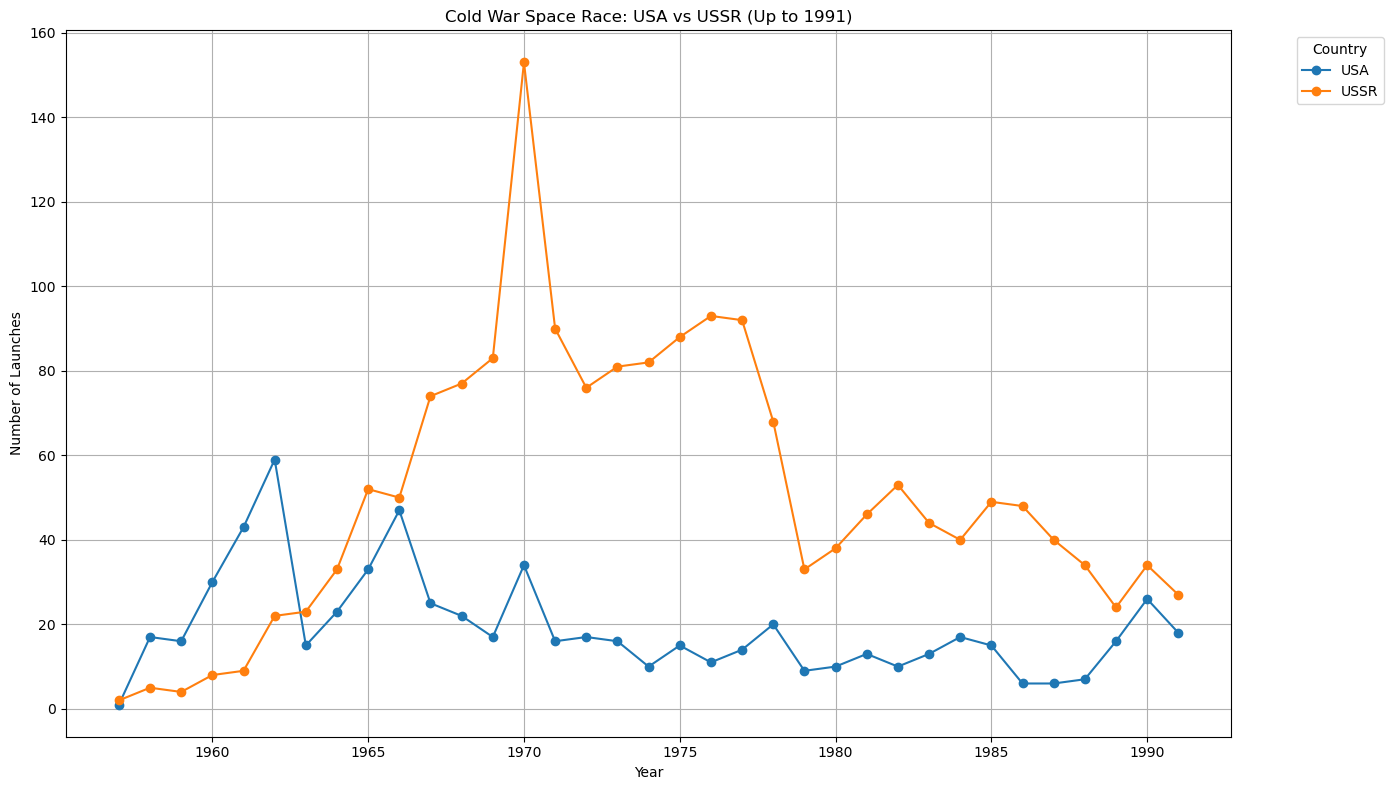

In [114]:
# Plot the Cold War space race
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='line', figsize=(14, 8), marker='o')
plt.title('Cold War Space Race: USA vs USSR (Up to 1991)')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.grid()
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [115]:
# Define a function to categorize locations into USA or USSR
def categorize_country(location):
    if "USA" in location:
        return "USA"
    elif "Kazakhstan" in location or "Russia" in location or "Baikonur" in location:
        return "USSR"
    else:
        return "Other"

# Categorize launches into USA, USSR, or Other
df_data['country'] = df_data['Location'].apply(categorize_country)

# Filter data for USA and USSR launches
usa_ussr_data = df_data[df_data['country'].isin(['USA', 'USSR'])]

# Calculate the total number of launches for each country
launch_counts = usa_ussr_data['country'].value_counts()

# Create a Pie Chart using Plotly
fig = px.pie(
    names=launch_counts.index,
    values=launch_counts.values,
    title='Total Number of Launches: USA vs USSR',
    color=launch_counts.index,  # Optional: Assign colors for each country
    color_discrete_map={'USA': 'blue', 'USSR': 'red'}
)

# Display the Pie Chart
fig.show()


## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

<Figure size 1400x800 with 0 Axes>

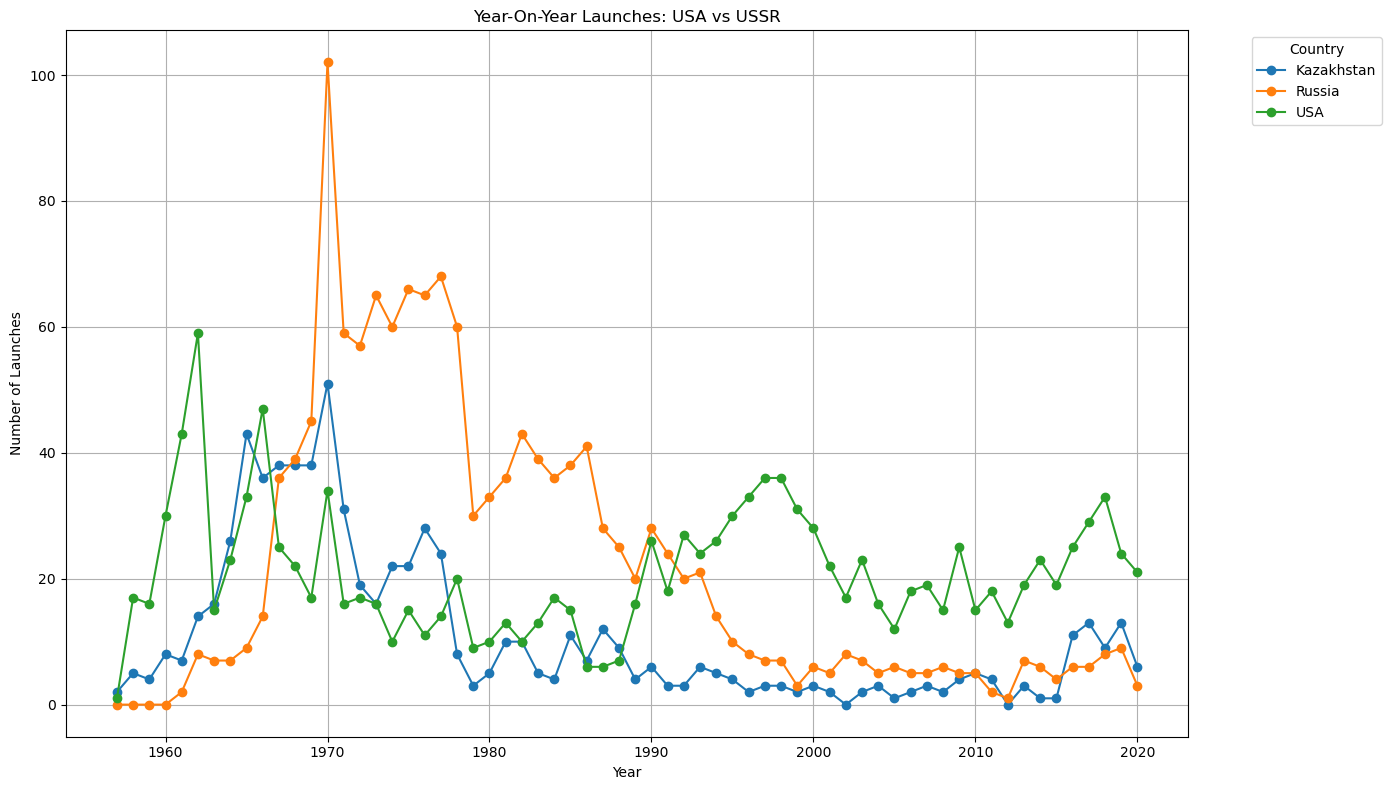

In [117]:
# Count the number of launches per year for each country
launches_yearly = usa_ussr_data.groupby(['Year', 'Country']).size().reset_index(name='Launch Count')

# Pivot the data for plotting
pivot_data = launches_yearly.pivot(index='Year', columns='Country', values='Launch Count').fillna(0)

# Plot the data
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='line', figsize=(14, 8), marker='o')
plt.title('Year-On-Year Launches: USA vs USSR')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.grid()
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Chart the Total Number of Mission Failures Year on Year.

In [123]:
failure_data = df_data[df_data['Mission_Status'].str.contains('Failure')]
failure_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month,Day,Country,Country_Code,country
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China",2020-07-10 04:17:00,"Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.30,Failure,2020,7,10,China,CHN,Other
15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand",2020-07-04 21:19:00,Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.50,Failure,2020,7,4,New Zealand,NZL,Other
27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...",2020-05-25 19:50:00,LauncherOne | Demo Flight,StatusActive,12.00,Failure,2020,5,25,USA,USA,USA
36,CASC,"LC-2, Xichang Satellite Launch Center, China",2020-04-09 11:46:00,Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,2020,4,9,China,CHN,Other
43,CASC,"LC-201, Wenchang Satellite Launch Center, China",2020-03-16 13:34:00,Long March 7A | XJY-6,StatusActive,0.00,Failure,2020,3,16,China,CHN,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4314,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28 02:53:00,Vanguard | Vanguard TV5,StatusRetired,0.00,Failure,1958,4,28,USA,USA,USA
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,0.00,Failure,1958,4,27,Kazakhstan,KAZ,USSR
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05 18:27:00,Juno I | Explorer 2,StatusRetired,0.00,Failure,1958,3,5,USA,USA,USA
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,1958,2,5,USA,USA,USA


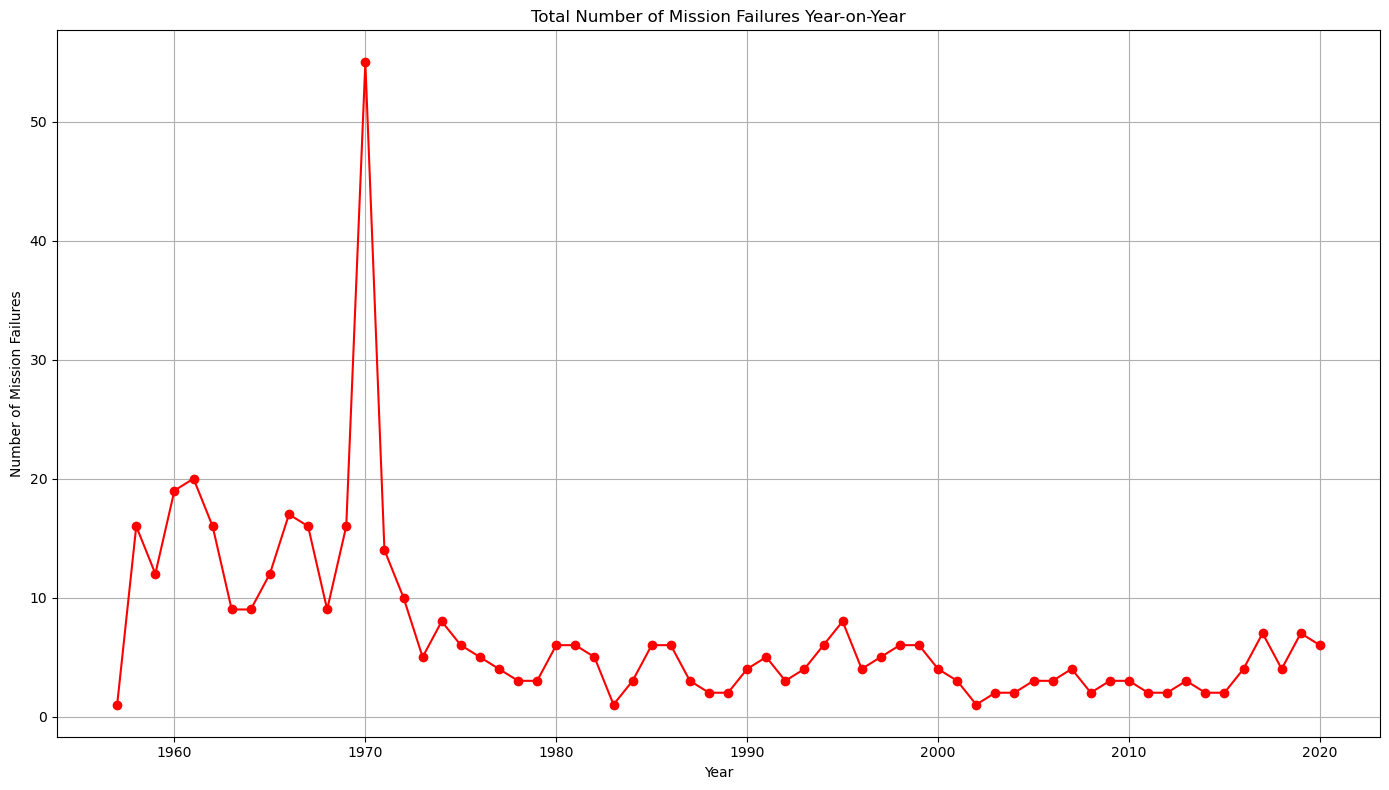

In [124]:
# Count the number of mission failures per year
failures_per_year = failure_data.groupby('Year').size().reset_index(name='Mission Failures')

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(failures_per_year['Year'], failures_per_year['Mission Failures'], marker='o', linestyle='-', color='red')
plt.title('Total Number of Mission Failures Year-on-Year')
plt.xlabel('Year')
plt.ylabel('Number of Mission Failures')
plt.grid()
plt.tight_layout()
plt.show()


## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [127]:
# Count total launches per year
total_launches_per_year = df_data.groupby('Year').size().reset_index(name='Total Launches')
failure_data = df_data[df_data['Mission_Status'].str.contains('Failure')]

In [128]:
# Count mission failures per year
failures_per_year = failure_data.groupby('Year').size().reset_index(name='Mission Failures')

In [129]:
# Merge total launches and failures data
merged_data = pd.merge(total_launches_per_year, failures_per_year, on='Year', how='left'


,Year,Total Launches,Mission Failures
0,1957,3,1
1,1958,22,16
2,1959,20,12
3,1960,38,19
4,1961,52,20
...,...,...,...
59,2016,88,4
60,2017,90,7
61,2018,117,4
62,2019,107,7


In [131]:
merged_data['Mission Failures'] = merged_data['Mission Failures'].fillna(0)
# Calculate the percentage of failures
merged_data['Failure Percentage'] = (merged_data['Mission Failures'] / merged_data['Total Launches']) * 100

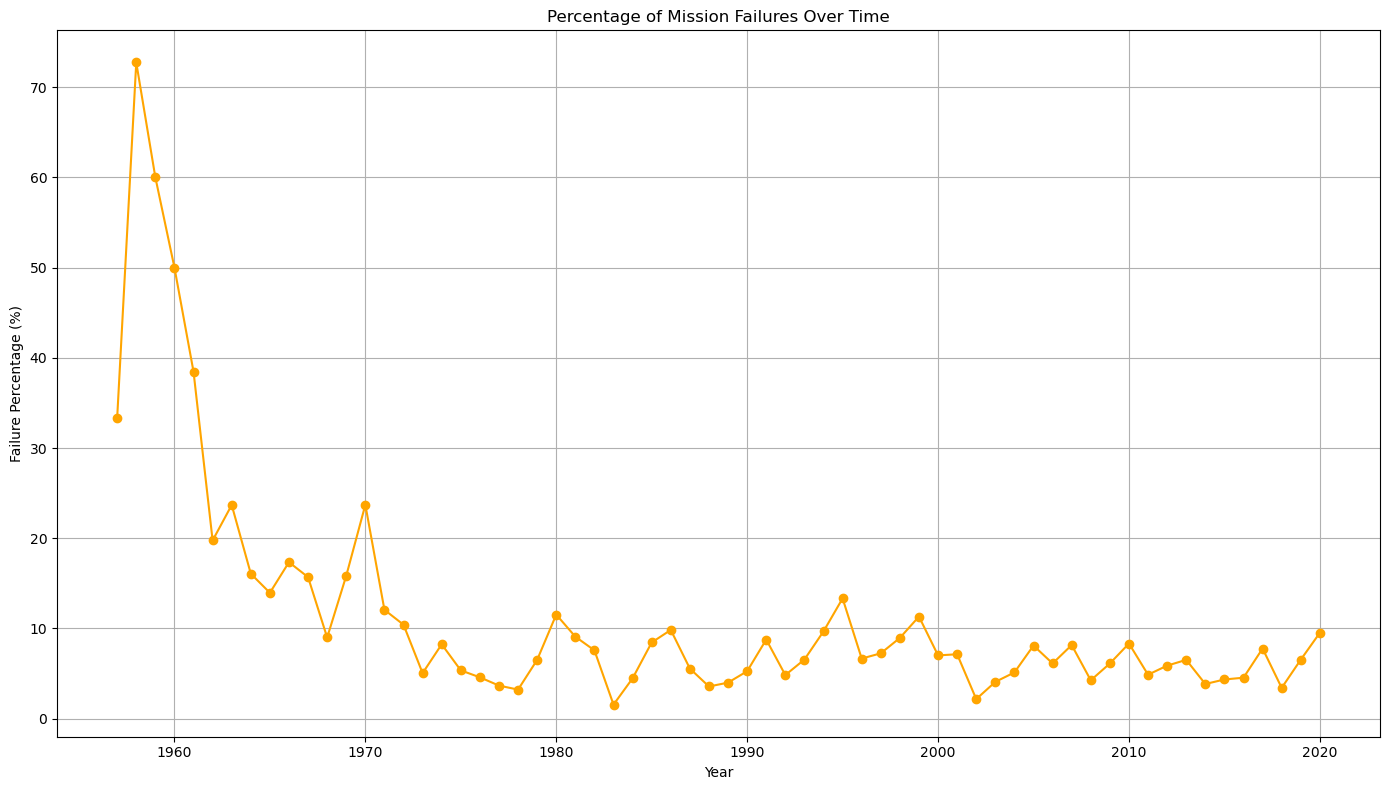

In [132]:
# Plot the percentage of failures over time
plt.figure(figsize=(14, 8))
plt.plot(merged_data['Year'], merged_data['Failure Percentage'], marker='o', linestyle='-', color='orange')
plt.title('Percentage of Mission Failures Over Time')
plt.xlabel('Year')
plt.ylabel('Failure Percentage (%)')
plt.grid()
plt.tight_layout()
plt.show()


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [134]:
# Filter data for years up to and including 2020
data_filtered = df_data[df_data['Year'] <= 2020]


In [136]:
# Count the number of launches per year for each country
launch_counts = data_filtered.groupby(['Year', 'Country']).size().reset_index(name='Launch Count')

In [137]:
# Determine the leading country for each year
leading_countries = launch_counts.loc[
    launch_counts.groupby('Year')['Launch Count'].idxmax()
].reset_index(drop=True)

In [138]:
# Display the result
print("Leading Country by Year (up to 2020):")
print(leading_countries)

Leading Country by Year (up to 2020):
    Year     Country  Launch Count
0   1957  Kazakhstan             2
1   1958         USA            17
2   1959         USA            16
3   1960         USA            30
4   1961         USA            43
..   ...         ...           ...
59  2016         USA            25
60  2017         USA            29
61  2018       China            39
62  2019       China            33
63  2020       China            22

[64 rows x 3 columns]


In [139]:
# Save to CSV for further analysis if needed
leading_countries.to_csv('leading_countries_by_year.csv', index=False)

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

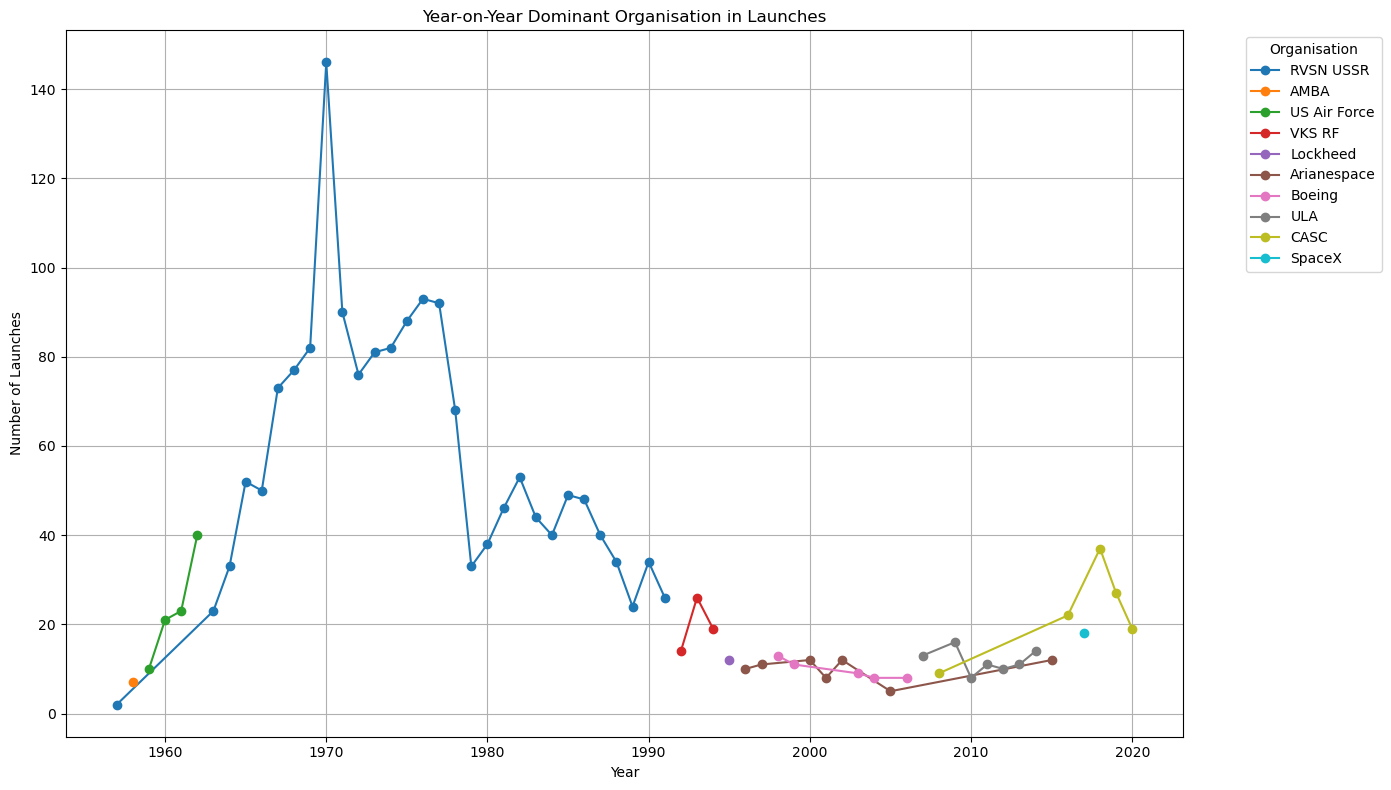

Dominant Organisations in the 1970s and 1980s:
    Year Organisation  Launch Count
13  1970    RVSN USSR           146
14  1971    RVSN USSR            90
15  1972    RVSN USSR            76
16  1973    RVSN USSR            81
17  1974    RVSN USSR            82
18  1975    RVSN USSR            88
19  1976    RVSN USSR            93
20  1977    RVSN USSR            92
21  1978    RVSN USSR            68
22  1979    RVSN USSR            33
23  1980    RVSN USSR            38
24  1981    RVSN USSR            46
25  1982    RVSN USSR            53
26  1983    RVSN USSR            44
27  1984    RVSN USSR            40
28  1985    RVSN USSR            49
29  1986    RVSN USSR            48
30  1987    RVSN USSR            40
31  1988    RVSN USSR            34
32  1989    RVSN USSR            24

Dominant Organisations in 2018, 2019, and 2020:
    Year Organisation  Launch Count
61  2018         CASC            37
62  2019         CASC            27
63  2020         CASC            19


In [143]:
# Filter for years up to 2020
data_filtered = df_data[df_data['Year'] <= 2020]

# Count the number of launches per organization per year
org_launch_counts = data_filtered.groupby(['Year', 'Organisation']).size().reset_index(name='Launch Count')

# Identify the organization with the most launches each year
dominant_orgs = org_launch_counts.loc[
    org_launch_counts.groupby('Year')['Launch Count'].idxmax()
].reset_index(drop=True)

# Plot the data
plt.figure(figsize=(14, 8))
for org in dominant_orgs['Organisation'].unique():
    org_data = dominant_orgs[dominant_orgs['Organisation'] == org]
    plt.plot(org_data['Year'], org_data['Launch Count'], marker='o', label=org)

plt.title('Year-on-Year Dominant Organisation in Launches')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.grid()
plt.legend(title='Organisation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display dominant organizations in the 1970s, 1980s, and 2018–2020
dominant_1970s_1980s = dominant_orgs[(dominant_orgs['Year'] >= 1970) & (dominant_orgs['Year'] < 1990)]
dominant_recent = dominant_orgs[dominant_orgs['Year'].isin([2018, 2019, 2020])]

print("Dominant Organisations in the 1970s and 1980s:")
print(dominant_1970s_1980s)

print("\nDominant Organisations in 2018, 2019, and 2020:")
print(dominant_recent)
